# Final Project: Generalized Bernstein-Vazirani Algorithm
**Advanced Quantum Logic Implementation**

---

**Microcredential:** Introduction to Quantum Computing  
**Period:** January 2026  

---

### Abstract
This notebook provides a robust implementation of the **Bernstein-Vazirani algorithm** using Qiskit. The project features a **parameterized architecture** capable of handling $n$-qubit registers for any arbitrary string length.

Key components include:
* **Theoretical Framework:** A mathematical breakdown of the quantum speedup.
* **Dynamic Oracle Construction:** Automated circuit generation based on hidden bitstrings.
* **Validation & Simulation:** Comprehensive testing using the `Aer` simulator with real-world string-to-binary mapping.




Aquí iria la explicación del algoritmo

In [37]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc matplotlib
!pip install pandas

In [38]:
%matplotlib inline

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt
import numpy as np

Explicación oraculo

In [39]:
def algorithm_bv(qc, secret_string):
  for qi, yesno in enumerate(reversed(secret_string)):
    if(yesno == '1'):
      qc.cx(qi, len(secret_string))
  return qc

In [49]:
def create_circuit(secret_string):
  n = len(secret_string)
  qc = QuantumCircuit(n + 1, n)

  qc.x(n)
  qc.h(range(n + 1))
  qc.barrier()

  qc = algorithm_bv(qc, secret_string)
  qc.barrier()

  qc.h(range(n))

  qc.measure(range(n),range(n))

  return qc, n

Explicacion del circuito completo

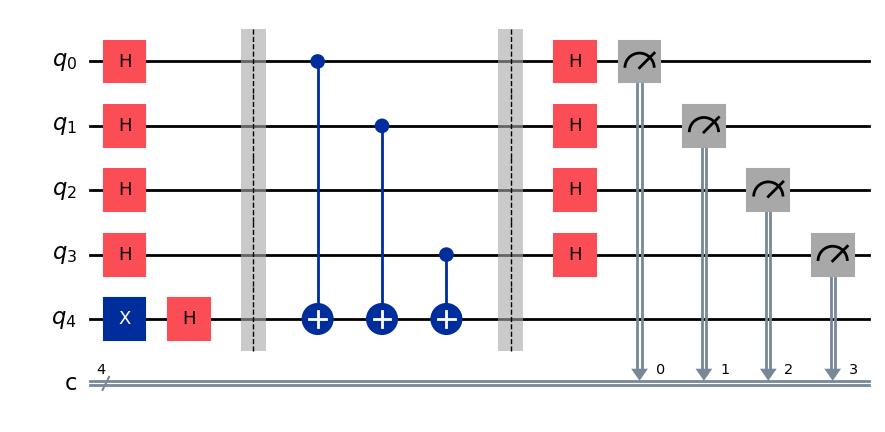

In [50]:
secret_string = '1011'

circuit, n_qubits = create_circuit(secret_string)

display(circuit.draw('mpl'))


In [52]:
import binascii
import pandas
from IPython.display import display, HTML

string_words = ["Hello", "Qiskit", "Quantum", "Logic", "Bits", "101", "Physics", "Bernstein"]
bin_words = list(map(lambda w: ''.join(format(ord(char), '08b') for char in w), string_words))

simulator = AerSimulator()
df_results = pandas.DataFrame(columns=["CIRCUIT SIZE", "TARGET WORD", "DECODED RESULT" , "EXPECTED BINARY", "RAW MEASUREMENT"])

for original_text, binary_secret in zip(string_words, bin_words):
    qc, n = create_circuit(binary_secret)

    job = simulator.run(qc, shots=1)
    counts = job.result().get_counts()
    read_binary = list(counts.keys())[0]

    n_bytes = int(read_binary, 2).to_bytes((len(read_binary) + 7) // 8, byteorder='big')
    try:
        recover_text = n_bytes.decode('utf-8', errors='ignore')
        df_results.loc[len(df_results)] = [n,original_text,recover_text , binary_secret, read_binary]
    except:
        recover_text = "[Error decoding string]"

df_results['STATE'] = df_results.apply(
    lambda row: "CORRECT" if row["EXPECTED BINARY"] == row["RAW MEASUREMENT"] else "ERROR",
    axis=1
)

styled_table = df_results.style.set_table_attributes('style="width:90%; border-collapse: collapse; text-align:center;"') \
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('border-top', '2px solid #777'),
            ('border-bottom', '2px solid #777'),
            ('padding', '12px 5px'),
            ('text-align', 'center'),
            ('font-size', '13px'),
            ('text-transform', 'uppercase')
        ]},
        {'selector': 'td', 'props': [
            ('padding', '10px 5px'),
            ('border-bottom', '1px solid #44444433'),
            ('text-align', 'center'),
            ('font-family', 'monospace'),
            ('font-size', '14px')
        ]},
    ]) \
    .map(lambda v: 'color: #2e7d32; font-weight: bold;' if v == "CORRECT" else ('color: #c62828; font-weight: bold;' if v == "ERROR" else ''), subset=['STATE'])

display(HTML("""
    <div style="font-family: sans-serif; color: #FFF; padding: 10px 0; border-bottom: 2px solid #777; width: 100%; margin-bottom: 10px; text-align:center">
        <span style="font-size: 18px; font-weight: bold; letter-spacing: 1px;">
            ADVANCED DEMONSTRATION: TEXT DECODING
        </span>
    </div>
"""))

display(styled_table)

,CIRCUIT SIZE,TARGET WORD,DECODED RESULT,EXPECTED BINARY,RAW MEASUREMENT,STATE
0,40,Hello,Hello,0100100001100101011011000110110001101111,0100100001100101011011000110110001101111,CORRECT
1,48,Qiskit,Qiskit,010100010110100101110011011010110110100101110100,010100010110100101110011011010110110100101110100,CORRECT
2,56,Quantum,Quantum,01010001011101010110000101101110011101000111010101101101,01010001011101010110000101101110011101000111010101101101,CORRECT
3,40,Logic,Logic,0100110001101111011001110110100101100011,0100110001101111011001110110100101100011,CORRECT
4,32,Bits,Bits,01000010011010010111010001110011,01000010011010010111010001110011,CORRECT
5,24,101,101,001100010011000000110001,001100010011000000110001,CORRECT
6,56,Physics,Physics,01010000011010000111100101110011011010010110001101110011,01010000011010000111100101110011011010010110001101110011,CORRECT
7,72,Bernstein,Bernstein,010000100110010101110010011011100111001101110100011001010110100101101110,010000100110010101110010011011100111001101110100011001010110100101101110,CORRECT
